# 유사 문제 찾기

In [ ]:
import pandas as pd
df = pd.read_csv('.csv', encoding = 'unicode_escape')
df.head()

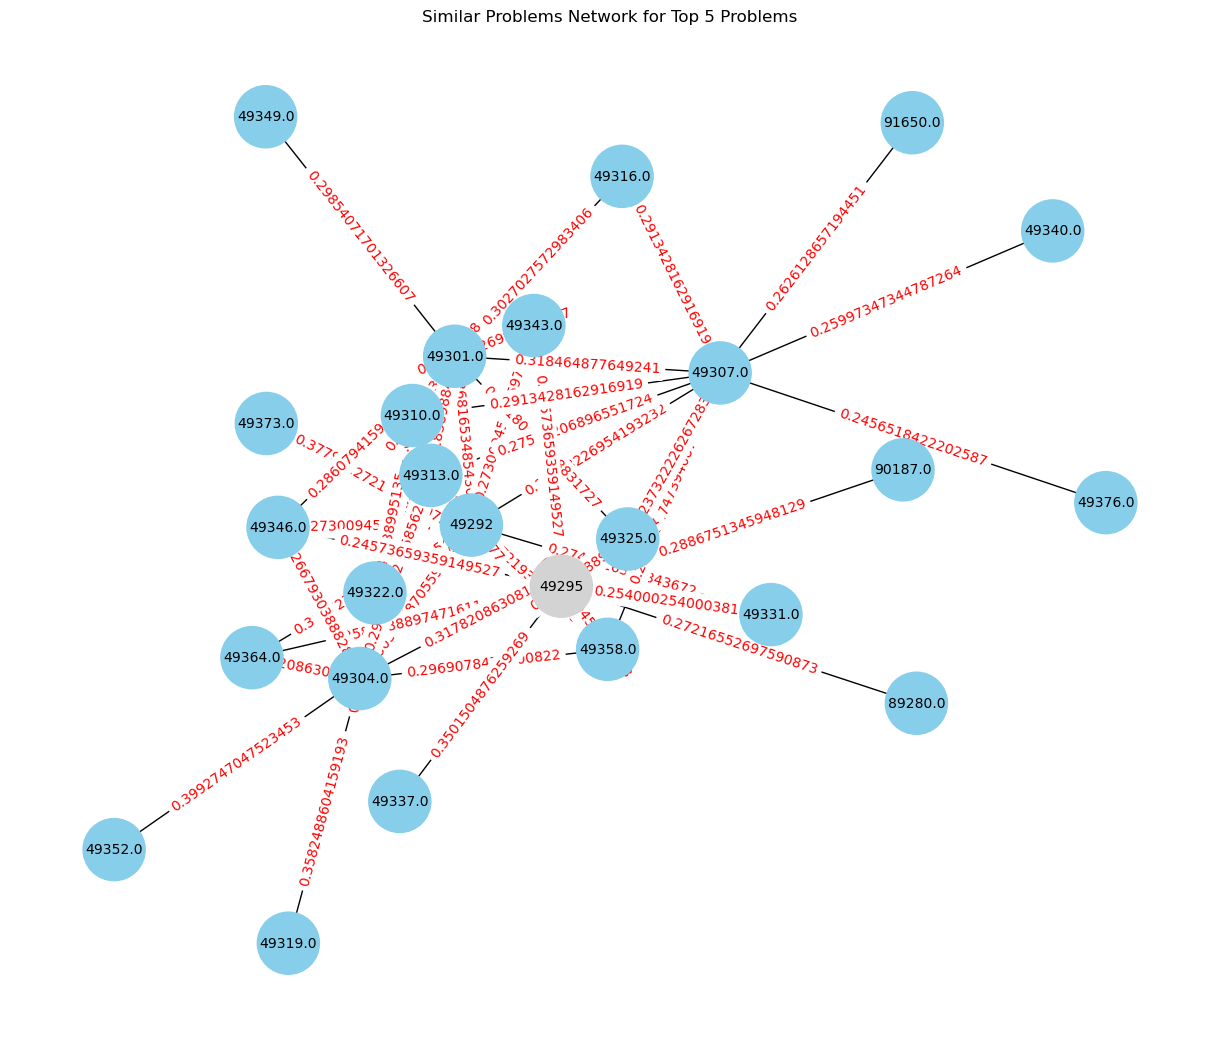

In [261]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_similar_problems_networkx(sim_df, item_id, G=None, selected_nodes=None):
    if G is None:
        G = nx.Graph()
    if selected_nodes is None:
        selected_nodes = set()
    G.add_node(item_id)  # 기준 문제 노드 추가
    for idx, row in sim_df.iterrows():
        G.add_node(row[''])
        G.add_edge(item_id, row[''], weight=row[''])
        selected_nodes.add(row[''])  # 선택된 문제 노드 추가
    
    return G, selected_nodes

# 예시: 상위 5개 문제에 대한 유사한 문제 네트워크 시각화
G_combined = None
selected_nodes = set()
prob_list = item_based_collabor.index.tolist()[:5]  # 상위 5개 문제만 선택

for prob in prob_list:
    similar_problems = get_similar_problem(prob)
    G_combined, selected_nodes = plot_similar_problems_networkx(similar_problems, prob, G_combined, selected_nodes)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_combined)  # 그래프 레이아웃 설정
edge_labels = {(n1, n2): d[''] for n1, n2, d in G_combined.edges(data=True)}

# 노드 색상 설정 - 선택된 5개 = skyblue / 선택되지 않은 것 = lightgray
node_color = ['skyblue' if node in selected_nodes else 'lightgray' for node in G_combined.nodes()]

nx.draw(G_combined, pos, with_labels=True, node_size=2000, node_color=node_color, font_size=10)
nx.draw_networkx_edge_labels(G_combined, pos, edge_labels=edge_labels, font_color='red')
plt.title(f'Similar Problems Network for Top 5 Problems')
plt.show()


# 스테레오 비전으로 이미지의 심도 알아보기
## 출처: https://github.com/boringariel/python/blob/tmp/computer_vision/%EC%8A%A4%ED%85%8C%EB%A0%88%EC%98%A4%20%EB%B9%84%EC%A0%84%EC%9C%BC%EB%A1%9C%20%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%9D%98%20%EC%8B%AC%EB%8F%84%20%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb

In [168]:
# 패키지 및 이미지 불러오기
import cv2 as cv
from matplotlib import pyplot as plt

# 흑백 사진은 imread 함수를 사용할 때 패러미터로 0을 입력하면 2차원으로 불러올 수 있습니다
imgL = cv.imread("./tsukuba_l.png", 0)
imgR = cv.imread("./tsukuba_r.png", 0)

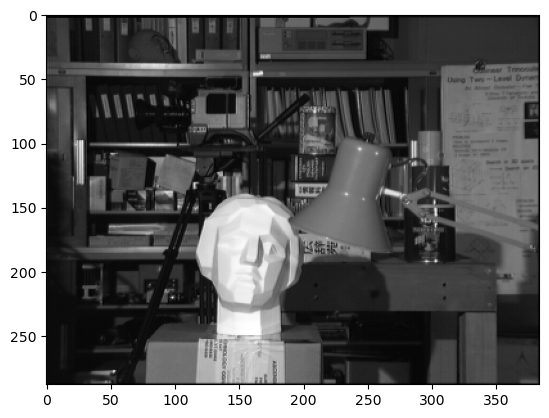

In [169]:
# imgL 시각화하기, 패러미터로 'gray'를 입력하면 흑백사진으로 표현된다
plt.imshow(imgL, 'gray')
plt.show()

In [162]:
# 스테레오 이미지 처리하기
stereo = cv.StereoBM_create(numDisparities=32, blockSize=21)
disparity = stereo.compute(imgL, imgR)

# 연산값은 array 형식으로 저장된다
disparity

array([[-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16],
       ...,
       [-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16]], dtype=int16)

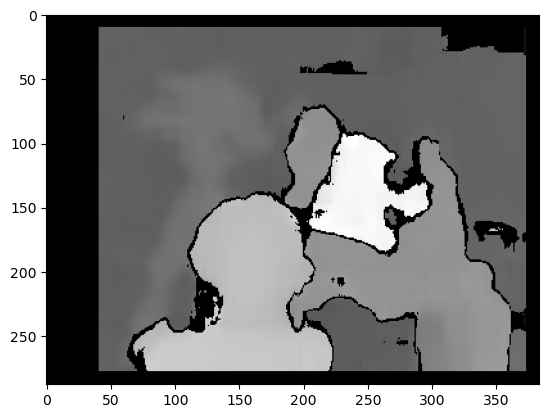

In [163]:
plt.imshow(disparity,'gray')
plt.show()

In [299]:
png = cv.imread("./Pictures/test.png", 0)
half_size = round(png.shape[1]/2)
pngL = png[:,:half_size]
pngR = png[:,half_size:]

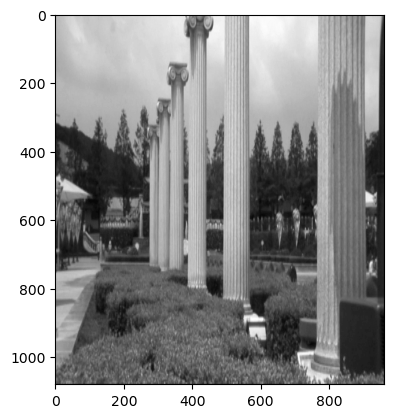

In [300]:
plt.imshow(pngL, 'gray')
plt.show()

In [301]:
# 스테레오 이미지 처리하기
stereo = cv.StereoBM_create(numDisparities=32, blockSize=21)
disparity2 = stereo.compute(pngL, pngR)

# 연산값은 array 형식으로 저장된다
disparity2

array([[-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16],
       ...,
       [-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16]], dtype=int16)

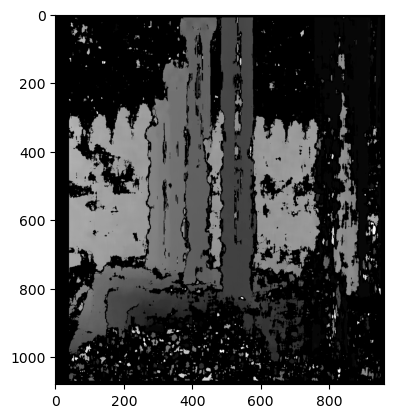

In [302]:
plt.imshow(disparity2, 'gray')
plt.show()